Exploring the Arts Council National Portfolio 2018-2022

On 27 June 2017, the Arts Council for England announced the National Portfolio Organisations for the next four years, a factsheet and a dataset! 

Now we've explored and tidied the dataset, it's time to explore it.

Author: Edafe Onerhime

Last Updated: 2018-08-04

Description: Explores the Arts Council National Portfolio 2018-2022 dataset

Contents: Notebook folder with this Jupyter Notebook, data folder, research folder

In [1]:
%matplotlib notebook

import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
fileDetails = {'portfolio':'NPO_successful_20182022_July_6_portfolio.csv', 'funding':'NPO_successful_20182022_July_6_funding.csv'}

dataOutputFolder = os.path.join(os.pardir,'data','output')

In [3]:
# Load into Pandas
fname = os.path.join(dataOutputFolder,fileDetails['funding'])   
dfFunding = pd.read_csv(open(fname,'rb'),index_col=['Applicant Name','Funding Band','Year'])
dfFunding[['Period','Type']] = dfFunding[['Period','Type']].apply(pd.Categorical)

fname = os.path.join(dataOutputFolder,fileDetails['portfolio'])
dfPortfolio = pd.read_csv(open(fname,'rb'),index_col=['Applicant Name','Funding Band'])

In [4]:
dfFunding.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5908 entries, (1927, 1, 2015) to (ZooNation Ltd, 1, 2021)
Data columns (total 3 columns):
Amount    5908 non-null int64
Period    5908 non-null category
Type      5908 non-null category
dtypes: category(2), int64(1)
memory usage: 87.6+ KB


In [5]:
# Quick sample to see what the data looks like 
dfFunding.sample(n=20)

,,,Amount,Period,Type
Applicant Name,Funding Band,Year,,,
CapeUK,SSO,2018,1024721,2018-2022,Grant
Counterpoints Arts,1,2017,80000,2015-2018,Fund
Exeter Phoenix,1,2016,125725,2015-2018,Fund
Birmingham LGBT,1,2015,0,2015-2018,Fund
Tiata Fahodzi Ltd,1,2019,210000,2018-2022,Grant
Kinetika People,1,2015,98845,2015-2018,Fund
Art Services Grants Ltd,1,2020,221221,2018-2022,Grant
English Stage Company Limited,3,2016,2311234,2015-2018,Fund
New Art Exchange Ltd,2,2021,852898,2018-2022,Grant


<IPython.core.display.Javascript object>


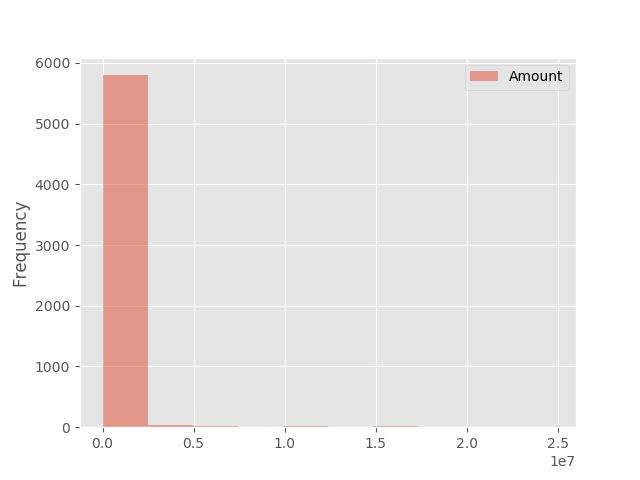

In [6]:
# Checking out the distribution
dfFunding.plot.hist(alpha=0.5)

<IPython.core.display.Javascript object>


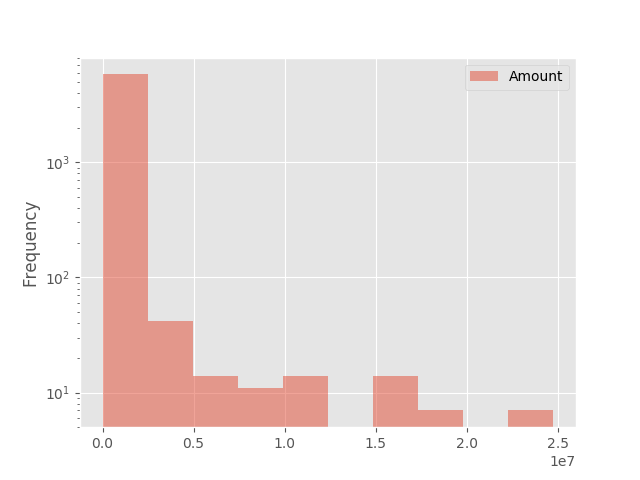

In [7]:
# So skewed! Let's try a log instead
dfFunding.plot.hist(alpha=0.5,log=True)

In [8]:
# Descriptive stats - Not using describe() as Amount isn't a normal distribution and describe focuses on mean, std etc.

df = pd.DataFrame(dfFunding.count(), columns=['count'])
df['unique'] = dfFunding.T.apply(lambda x: x.nunique(), axis=1)
df['min'] = dfFunding.min()
df['max'] = dfFunding.max()
df['median'] = dfFunding.median()
df['range'] = df['max'].apply(pd.to_numeric, errors='coerce') - df['min'].apply(pd.to_numeric, errors='coerce')
df['iqr'] = dfFunding.quantile(0.75) - dfFunding.quantile(0.25)
df

,count,unique,min,max,median,range,iqr
Amount,5908,804,0,24772000,157600.0,24772000.0,248523.0
Period,5908,2,2015-2018,2018-2022,NaN,NaN,NaN
Type,5908,2,Fund,Grant,NaN,NaN,NaN


In [13]:
# Recreating the investment factsheet stats for comparison: http://www.artscouncil.org.uk/sites/default/files/download-file/Investment__factsheet.pdf

# Headline stats
# The National Portfolio is made up of 831 organisations that hold 844 funding agreements, up 146 from 2015-18.

Applicants2018 = dfFunding.index.get_level_values('Applicant Name').nunique()
Agreements2018 = dfPortfolio.shape[0]
Agreements2015, Applicants2015 = [685,681] # From http://www.artscouncil.org.uk/sites/default/files/download-file/National-portfolio_Major-partner-musuems_2015-18_investment_0.xlsx

print('The National Portfolio is made up of',Applicants2018,'organisations that hold',Agreements2018,'funding agreements.')
print('Applicants are up',Applicants2018 - Applicants2015,'from 2015')
print('Agreements are up',Agreements2018 - Agreements2015,'from 2015')

The National Portfolio is made up of 831 organisations that hold 844 funding agreements.
Applicants are up 150 from 2015
Agreements are up 159 from 2015
